# Scenario 1
- Inputs: Simulator, 
- Query: Will Intervention keep hospitalizations below 3000?
- Intervention 1: Dec 1 - Mar 1, 5% decrease in transmission
- Intervention 2: Jan 1 - Mar 1, X% decrease required?

# Open Issues
1. Infected > Hospitalized, how is Hospitalized defined?
    - Assume that H = I * HR, HR = hospitalization rate, maybe synthesize HR
2. Initial Conditions?  
    - From Data.  

# Goals
1. Synthesize (X, Start Intervention)
2. Synthesize (HR, gamma, End of Intervention)
3. Models: CHIME, BUCKY, CHIME SVIIR

# Analysis:
1. Intervention 1 works (yes/no), Intervention 2 (range of X that works, single variable synthesis)
2. Compute a metric: I1: sum of differences with threshold, I2: uniform grid evaluation of sum of differences.
3. Additional Parameters: HR, Start of Intervention, 
4. Sensitivity Analysis: What values of infection rate will the intervention work or not.  

# Operations:
- evaluate point
- project onto subset of dimensions
- project after assigning dimensions 
- Evaluate metric over remaining space

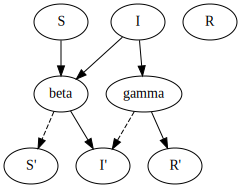

In [1]:
from model2smtlib.bilayer.translate import Bilayer, BilayerEncodingOptions, BilayerModel
from funman.scenario.consistency import ConsistencyScenario
from funman.scenario.parameter_synthesis import ParameterSynthesisScenario
from funman import Funman
from funman.model import Parameter, QueryLE
from funman.search_utils import SearchConfig
from funman_demo.handlers import ResultCacheWriter, RealtimeResultPlotter, NotebookImageRefresher
from funman.search_utils import ResultCombinedHandler, SearchConfig
import os
import tempfile

%load_ext autoreload
%autoreload 2

chime_bilayer_src = {
    "Wa": [{"influx": 1, "infusion": 2}, {"influx": 2, "infusion": 3}],
    "Win": [
        {"arg": 1, "call": 1},
        {"arg": 2, "call": 1},
        {"arg": 2, "call": 2},
    ],
    "Box": [{"parameter": "beta"}, {"parameter": "gamma"}],
    "Qin": [{"variable": "S"}, {"variable": "I"}, {"variable": "R"}],
    "Qout": [{"tanvar": "S'"}, {"tanvar": "I'"}, {"tanvar": "R'"}],
    "Wn": [{"efflux": 1, "effusion": 1}, {"efflux": 2, "effusion": 2}],
}

chime_bilayer = Bilayer.from_json(chime_bilayer_src)
chime_bilayer.to_dot()

# model = BilayerModel(
#     chime_bilayer,
#     init_values={"S": 1000, "I": 1, "R": 1},
#     parameter_bounds=None,
#     encoding_options=BilayerEncodingOptions(step_size=4, max_steps=16),
# )
# query = QueryLE(model, "I", 100)
# tmp_dir_path = tempfile.mkdtemp(prefix="funman-")
# parameters = [
#     Parameter("beta", lb=0.0001, ub=0.001),
#     Parameter("gamma", lb=0.0, ub=0.25),
# ]
# result = Funman().solve(
#     ParameterSynthesisScenario(
#         parameters,
#         model,
#         query,
#     ),
#     config=SearchConfig(
#         number_of_processes=1,
#         tolerance=1e-2,
#         wait_action = NotebookImageRefresher("search.png"),
#         handler=ResultCombinedHandler(
#             [
#                 ResultCacheWriter(os.path.join(tmp_dir_path, "search.json")),
#                 RealtimeResultPlotter(
#                     parameters,
#                     plot_points=True,
#                     realtime_save_path=os.path.join(tmp_dir_path, "search.png"),
#                 ),
#             ]
#         ),
#     ),
# )

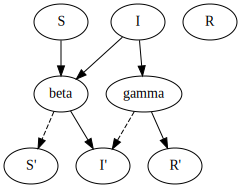

In [2]:
chime_bilayer_src = {
    "Wa": [{"influx": 1, "infusion": 2}, {"influx": 2, "infusion": 3}],
    "Win": [
        {"arg": 1, "call": 1},
        {"arg": 2, "call": 1},
        {"arg": 2, "call": 2},
    ],
    "Box": [{"parameter": "beta"}, {"parameter": "gamma"}],
    "Qin": [{"variable": "S"}, {"variable": "I"}, {"variable": "R"}],
    "Qout": [{"tanvar": "S'"}, {"tanvar": "I'"}, {"tanvar": "R'"}],
    "Wn": [{"efflux": 1, "effusion": 1}, {"efflux": 2, "effusion": 2}],
}

measurements = {
    "S" : [{"variable": "I"}],
    "O" : [{"observable" : "H"}],
    "D" : [{"parameter": "hr"}],
    "Din": [{"variable": 1, "parameter": 1}],
    "Dout": [{"parameter": 1, "observable": 1}]
}

chime_bilayer = Bilayer.from_json(chime_bilayer_src, measurements)


chime_bilayer_src2 = {
    "Wa": [{"influx": 1, "infusion": 2}, {"influx": 2, "infusion": 3}],
    "Win": [
        {"arg": 1, "call": 1},
        {"arg": 2, "call": 1},
        {"arg": 2, "call": 2},
    ],
    "Box": [{"parameter": "beta"}, {"parameter": "gamma"}],
    "Qin": [{"variable": "S"}, {"variable": "I"}, {"variable": "R"}],
    "Qout": [{"tanvar": "S'"}, {"tanvar": "I'"}, {"tanvar": "R'"}],
    "Wn": [{"efflux": 1, "effusion": 1}, {"efflux": 2, "effusion": 2}],
}

measurements2 = {
    "S" : [{"variable": "I"}],
    "O" : [{"observable" : "H"}],
    "D" : [{"parameter": "hr"}],
    "Din": [{"variable": 1, "parameter": 1}],
    "Dout": [{"parameter": 1, "observable": 1}]
}
chime_bilayer2 = Bilayer.from_json(chime_bilayer_src2, measurements2)

fail = Bilayer.from_json({}, {})
HybridAutomaton(
    [Node(chime_bilayer, QueryLE(chime_bilayer, "I", 1000)), Node(chime_bilayer2, QueryLE(chime_bilayer, "I", 1000)), Node(fail, None)],
    [Jump(chime_bilayer, Guard(QueryLE(chime_bilayer, "days", 10)),chime_bilayer2)]
    )

chime_bilayer = Bilayer.from_json(chime_bilayer_src, measurements)
chime_bilayer.to_dot()


(:process infection
 :parameters (?gamma)
 :precondition (and)
 :effect (and 
            (increase (I) (function1))
            (increase (R) (function2))
            (increase (S) (function3))
            )
 )

 (:durative-action mandate
  :parameters ()
  :duraiton (?duration)
  :precondition (and)
  :effect (and (at-start (increase (beta) (function1))
                (at-end (decrease (beta) (function1))))
  )

  (:event infected-threshold
   :precondtion (>= I 1000)
   :effect (fail)
   )

In [2]:
result = Funman().solve(
    ConsistencyScenario(
        BilayerModel(
            chime_bilayer,
            init_values={"S": 1000, "I": 1, "R": 1},
            parameter_bounds={
                "beta": [0.00067, 0.00067],
                "gamma": [1.0 / 14.0, 1.0 / 14.0],
            },
            encoding_options=BilayerEncodingOptions(step_size=4, max_steps=16),
        )
    )
)
result.plot()


AttributeError: 'BilayerModel' object has no attribute 'scenario'

In [1]:
# model = BilayerModel(
#     chime_bilayer,
#     init_values={"S": 1000, "I": 1, "R": 1},
#     parameter_bounds=None,
#     encoding_options=BilayerEncodingOptions(step_size=4, max_steps=16),
# )
# query = QueryLE(model, "I", 100)
# tmp_dir_path = tempfile.mkdtemp(prefix="funman-")
# parameters = [
#     Parameter("beta", lb=0.0001, ub=0.001),
#     Parameter("gamma", lb=0.0, ub=0.25),
# ]
# result = Funman().solve(
#     ParameterSynthesisScenario(
#         parameters,
#         model,
#         query,
#     ),
#     config=SearchConfig(
#         number_of_processes=1,
#         tolerance=5e-1,
#         handler=ResultCombinedHandler(
#             [
#                 ResultCacheWriter(os.path.join(tmp_dir_path, "search.json")),
#                 RealtimeResultPlotter(
#                     parameters,
#                     plot_points=True,
#                     realtime_save_path=os.path.join(tmp_dir_path, "search.png"),
#                 ),
#             ]
#         ),
#     ),
# )


NameError: name 'BilayerModel' is not defined

# Scneario 2
- Inputs:
    - Query: Rate of vaccination to keep cases under threshold over period of time
    - Result: Compute minimum vacc rate
- Parameters:
    - Vaccination rate
    - Age range (optional)
    - Age specific efficacy

# Scenario 3
- Identify indifference region wrt. parameters.
- Outside of indifference region are candidate parameters where one model is better.
- Generate two parameter spaces, identify symm diff, and evaluate metric over symm diff uniform grid.  Metric can be the fit to data.